## Cleaning Data _03_ Remove Bad Scrapes TR

In [1]:
file = './pickles/20181007_183404_clarify.pkl'

import pandas
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sbn

#!ls ./pickles/*
clean_data = pandas.read_pickle(file)

## UGGGGGHHHHHHH!!!!!!!
I just discovered that the world bank data, scraped from 
http://databank.worldbank.org/data/views/reports/reportwidget.aspx?Report_Name=CountryProfile&Id=b450fd57&tbar=y&dd=y&inf=n&zm=n&country=ABC
where ABC is a three letter country code (USA, CHN, JPN, ARM, MEX etc.)
However, for many of the lesser known countries, the website returned information, but it is not specific for the country. Rather it is generic WORLD data (whole world data combine?). These can be found because they all have the same values. The countries affected are:

{'SPM', 'PCN', 'TWN', 'ATF', 'CCK', 'MTQ', 'VAT', 'WLF', 'IOT', 'BLM', 'UMI', 'AIA', 'GGY', 'SGS', 'COK', 'CXR', 'BES', 'REU', 'ESH', 'ANT', 'NFK', 'MSR', 'GLP', 'SJM', 'MYT', 'ATA', 'SCG', 'SHN', 'JEY', 'TKL', 'NIU', 'ALA', 'HMD', 'FLK', 'GUF', 'BVT'}

After removing I have 580 rows of data and 20 features. 

In [2]:
mask = (clean_data['GDP']==80683.79) | (clean_data['GDP']==65956.67) | (clean_data['GDP']==33571.15) | (clean_data['GDP']== 22573.78)
failed_countries = set(clean_data[mask].CNT)
print(failed_countries)

{'CXR', 'REU', 'NFK', 'ALA', 'SPM', 'BVT', 'SHN', 'FLK', 'ATA', 'JEY', 'MTQ', 'IOT', 'UMI', 'GUF', 'MYT', 'ANT', 'ATF', 'AIA', 'PCN', 'SCG', 'SGS', 'TKL', 'BES', 'ESH', 'BLM', 'HMD', 'TWN', 'MSR', 'SJM', 'GLP', 'NIU', 'VAT', 'WLF', 'CCK', 'GGY', 'COK'}


In [158]:
clean_data_2 = clean_data[~mask]; clean_data_2.head(2)

,CNT,YR,POP_TOT,POP_GRO%,AREA,URB_GRO%,FORR_AREA,MORT_RATE,POP_DEN,GDP,...,GDP_GROW%,INF%,INTERNET%,FOR_INV_NET,IMM_MEAS,GNI_ATL,GPC_ATL,LIF_EXP,TEEN_FER_RATE,NET_MIG
0,ARM,2017.0,2.93,0.2,29.7,0.2,3.3,13.0,102.9,11.54,...,7.5,2.2,64.3,246.0,96.0,11.71,4000.0,75.0,24.0,-25.0
1,EGY,2017.0,97.55,1.9,1001.5,1.9,0.7,22.0,98.0,235.37,...,4.2,22.9,45.0,7392.0,94.0,293.38,3010.0,71.0,51.0,-275.0


In [167]:
continents = pandas.read_pickle("./countries_three_continent.pkl")

In [168]:
continents['CNT'] = continents['COUNTRY']  


In [169]:
continents = continents[['CNT', 'SUB_REGION']]

In [173]:
clean_2_region = pandas.merge(clean_data_2, continents, how='left', on=['CNT'])

In [177]:
clean_3_region = clean_2_region[['CNT', 'SUB_REGION', 'YR', 'POP_TOT', 'POP_GRO%', 'AREA', 'URB_GRO%', 'FORR_AREA',
       'MORT_RATE', 'POP_DEN', 'GDP', 'CELL_SUB%', 'FER_RATE', 'CO2_PERCAP',
       'GDP_GROW%', 'INF%', 'INTERNET%', 'FOR_INV_NET', 'IMM_MEAS', 'GNI_ATL',
       'GPC_ATL', 'LIF_EXP', 'TEEN_FER_RATE', 'NET_MIG' ]]

In [179]:
clean_3_region.to_pickle("./clean_with_regions_20181009_193904.pkl")

In [180]:
clean_3_region.head()

,CNT,SUB_REGION,YR,POP_TOT,POP_GRO%,AREA,URB_GRO%,FORR_AREA,MORT_RATE,POP_DEN,...,GDP_GROW%,INF%,INTERNET%,FOR_INV_NET,IMM_MEAS,GNI_ATL,GPC_ATL,LIF_EXP,TEEN_FER_RATE,NET_MIG
0,ARM,Western Asia,2017.0,2.93,0.2,29.7,0.2,3.3,13.0,102.9,...,7.5,2.2,64.3,246.0,96.0,11.71,4000.0,75.0,24.0,-25.0
1,EGY,Northern Africa,2017.0,97.55,1.9,1001.5,1.9,0.7,22.0,98.0,...,4.2,22.9,45.0,7392.0,94.0,293.38,3010.0,71.0,51.0,-275.0
2,KAZ,Central Asia,2017.0,18.04,1.4,2724.9,1.5,33.1,10.0,6.7,...,4.0,6.4,76.4,4542.0,99.0,142.27,7890.0,72.0,28.0,0.0
3,MEX,Latin America and the Caribbean,2017.0,129.16,1.3,1964.4,1.6,660.4,13.0,66.4,...,2.0,6.1,63.9,31726.0,96.0,1112.53,8610.0,77.0,61.0,-300.0
4,ZAF,Sub-Saharan Africa,2017.0,56.72,1.2,1219.1,2.0,92.4,37.0,46.8,...,1.3,5.5,54.0,1372.0,60.0,308.19,5430.0,63.0,44.0,300.0


In [182]:
dummies = pandas.get_dummies(clean_3_region['SUB_REGION'], dtype=float)

In [191]:
clean_4_dummies = clean_3_region.join(dummies)

In [194]:
clean_4_dummies[clean_4_dummies['MORT_RATE'] > 150 ]

,CNT,SUB_REGION,YR,POP_TOT,POP_GRO%,AREA,URB_GRO%,FORR_AREA,MORT_RATE,POP_DEN,...,Northern Africa,Northern America,Northern Europe,Polynesia,South-eastern Asia,Southern Asia,Southern Europe,Sub-Saharan Africa,Western Asia,Western Europe
106,NGA,Sub-Saharan Africa,2000.0,122.35,2.5,923.8,4.1,131.4,186.0,134.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
228,MOZ,Sub-Saharan Africa,2000.0,18.07,2.7,799.4,3.3,411.9,170.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
241,NER,Sub-Saharan Africa,2000.0,11.35,3.6,1267.0,4.1,13.3,224.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
266,BFA,Sub-Saharan Africa,2000.0,11.61,2.8,274.2,6.7,62.5,180.0,42.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
273,MLI,Sub-Saharan Africa,2000.0,10.97,2.8,1240.2,5.3,59.0,220.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
349,MDG,Sub-Saharan Africa,1990.0,11.60,2.9,587.0,5.2,136.9,160.0,19.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
387,SLE,Sub-Saharan Africa,2010.0,6.46,2.3,72.3,3.3,27.3,163.0,89.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
389,BDI,Sub-Saharan Africa,2000.0,6.40,1.9,27.8,4.5,2.0,157.0,249.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
391,ZMB,Sub-Saharan Africa,2000.0,10.53,2.8,752.6,1.5,511.3,165.0,14.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
394,AGO,Sub-Saharan Africa,2000.0,16.44,3.0,1246.7,5.4,597.3,206.0,13.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [4]:


clean_data_2[clean_data_2['GDP']>1000]
clean_data_2.head()

,CNT,YR,POP_TOT,POP_GRO%,AREA,URB_GRO%,FORR_AREA,MORT_RATE,POP_DEN,GDP,...,GDP_GROW%,INF%,INTERNET%,FOR_INV_NET,IMM_MEAS,GNI_ATL,GPC_ATL,LIF_EXP,TEEN_FER_RATE,NET_MIG
0,ARM,2017.0,2.93,0.2,29.7,0.2,3.3,13.0,102.9,11.54,...,7.5,2.2,64.3,246.0,96.0,11.71,4000.0,75.0,24.0,-25.0
1,EGY,2017.0,97.55,1.9,1001.5,1.9,0.7,22.0,98.0,235.37,...,4.2,22.9,45.0,7392.0,94.0,293.38,3010.0,71.0,51.0,-275.0
2,KAZ,2017.0,18.04,1.4,2724.9,1.5,33.1,10.0,6.7,159.41,...,4.0,6.4,76.4,4542.0,99.0,142.27,7890.0,72.0,28.0,0.0
3,MEX,2017.0,129.16,1.3,1964.4,1.6,660.4,13.0,66.4,1149.92,...,2.0,6.1,63.9,31726.0,96.0,1112.53,8610.0,77.0,61.0,-300.0
4,ZAF,2017.0,56.72,1.2,1219.1,2.0,92.4,37.0,46.8,349.42,...,1.3,5.5,54.0,1372.0,60.0,308.19,5430.0,63.0,44.0,300.0


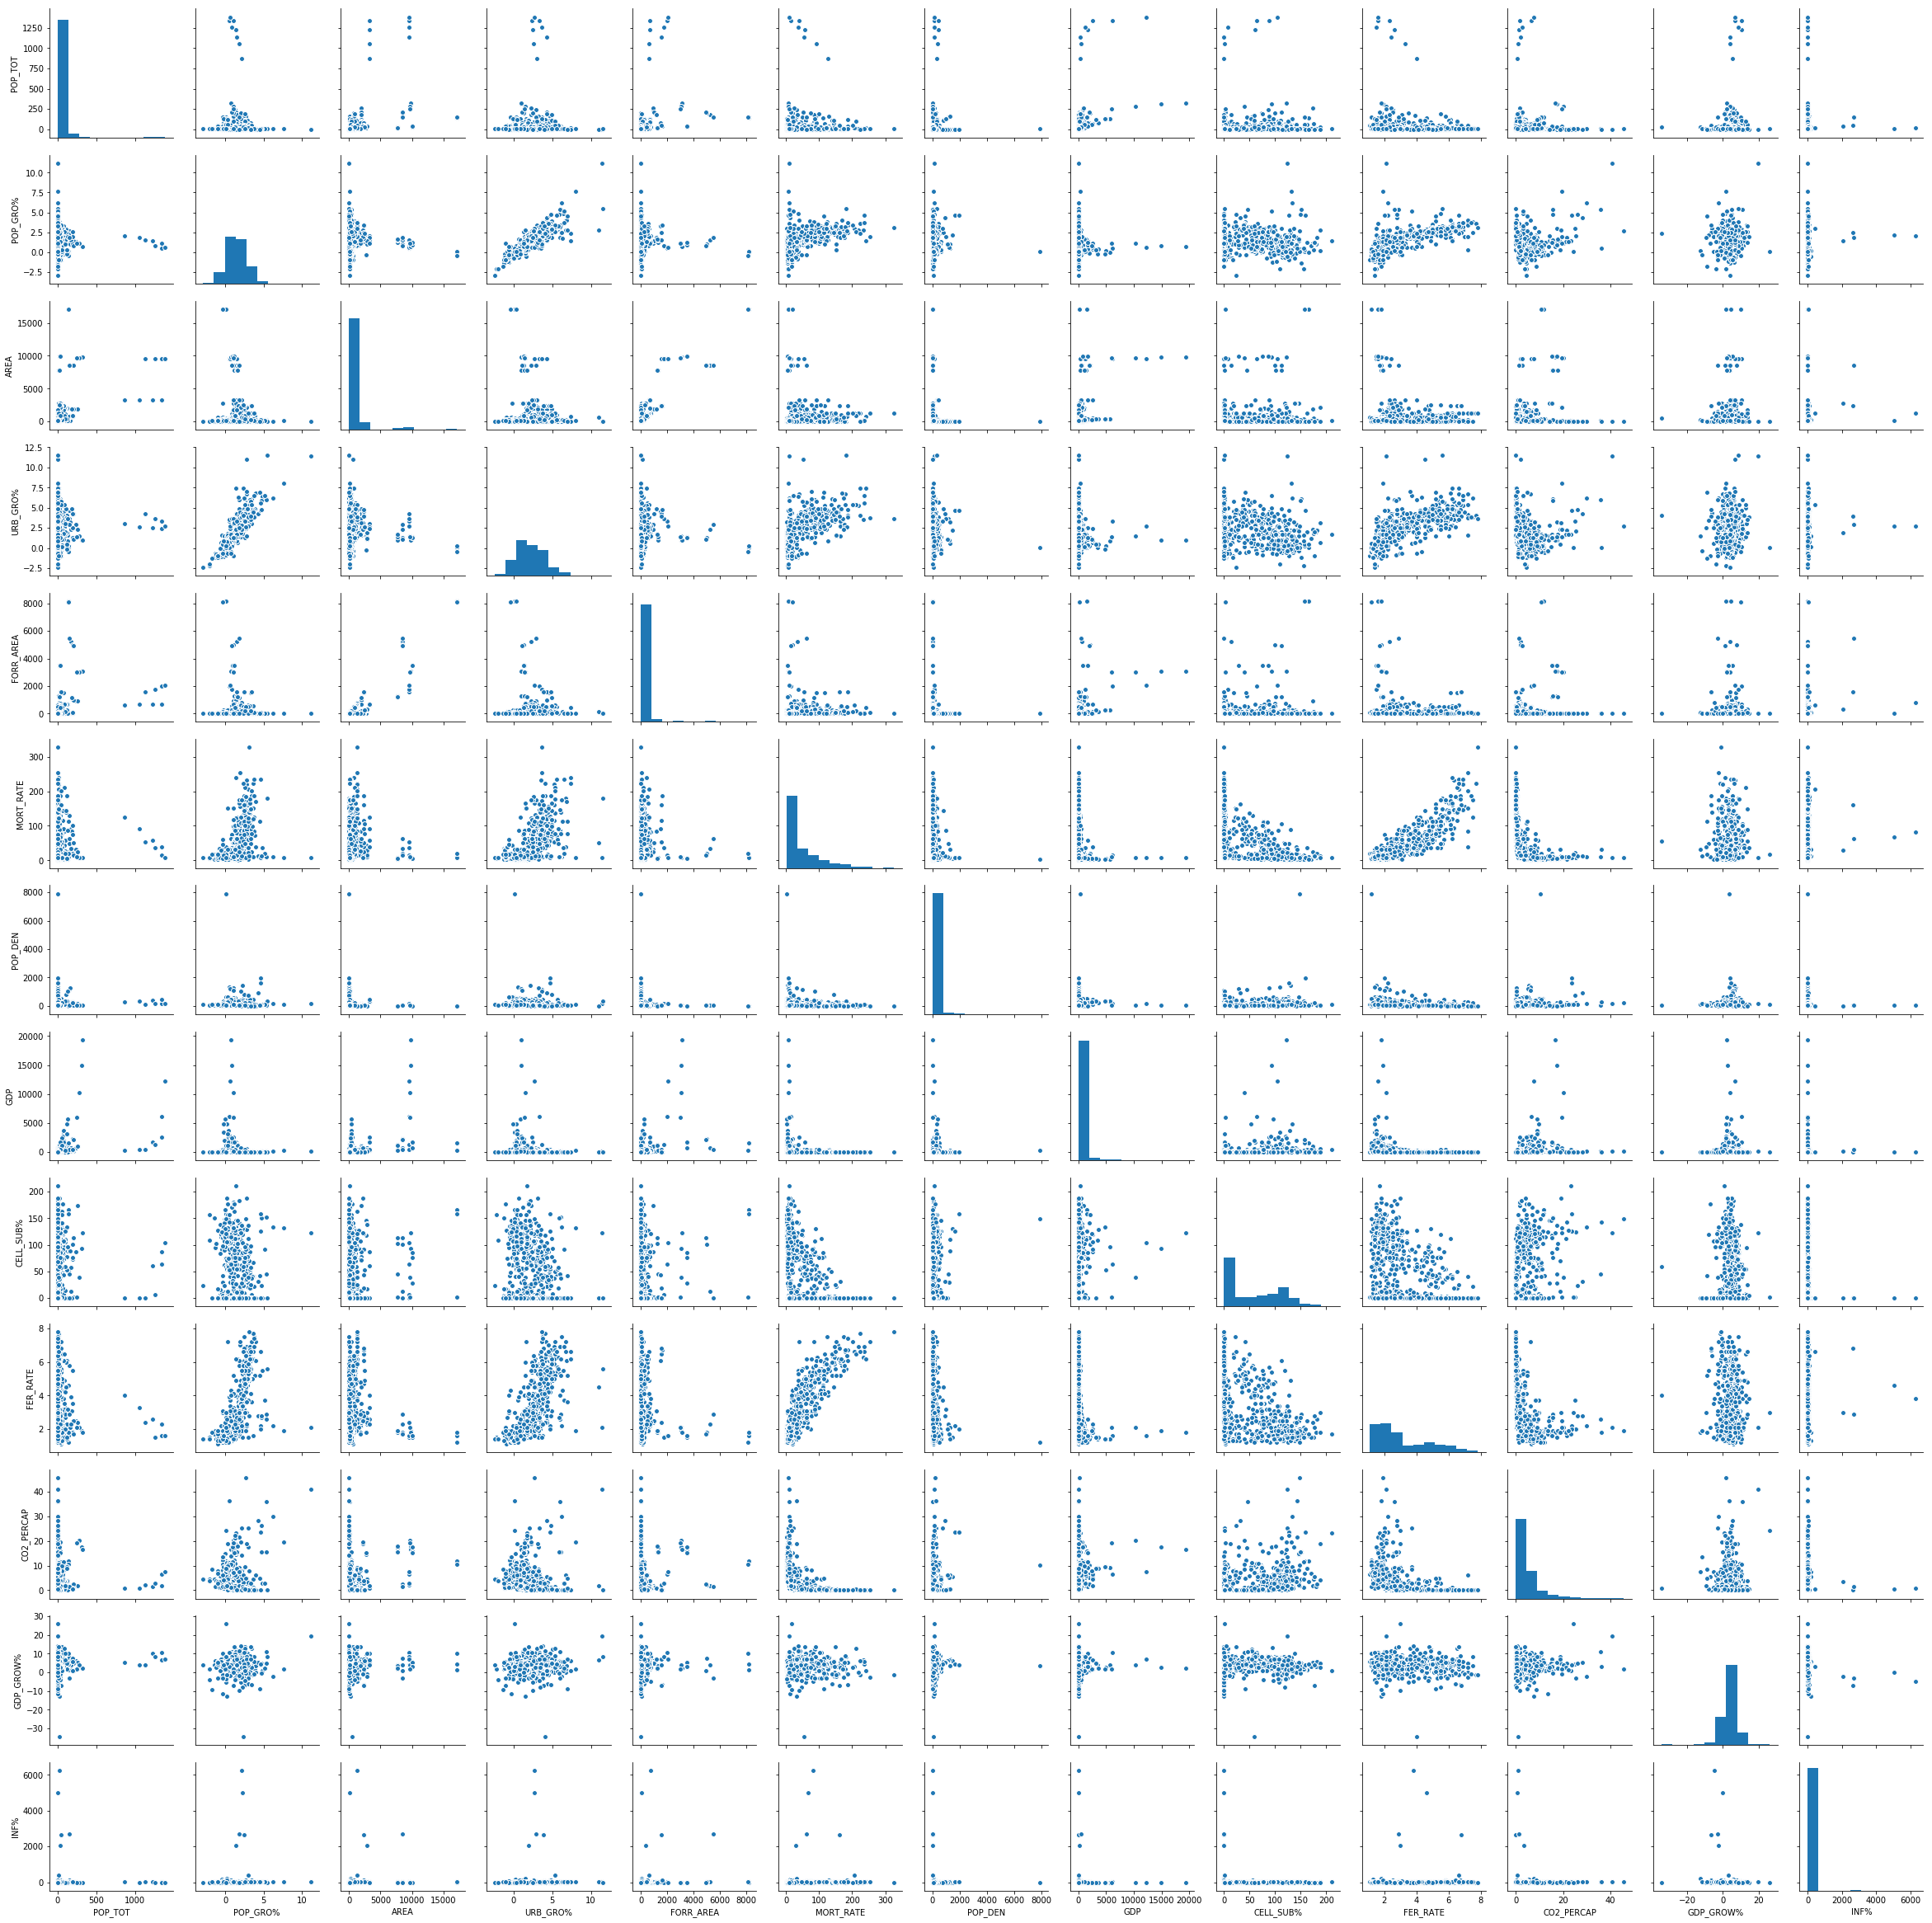

In [115]:
sbn.pairplot( clean_data_2.iloc[:,2:15] )

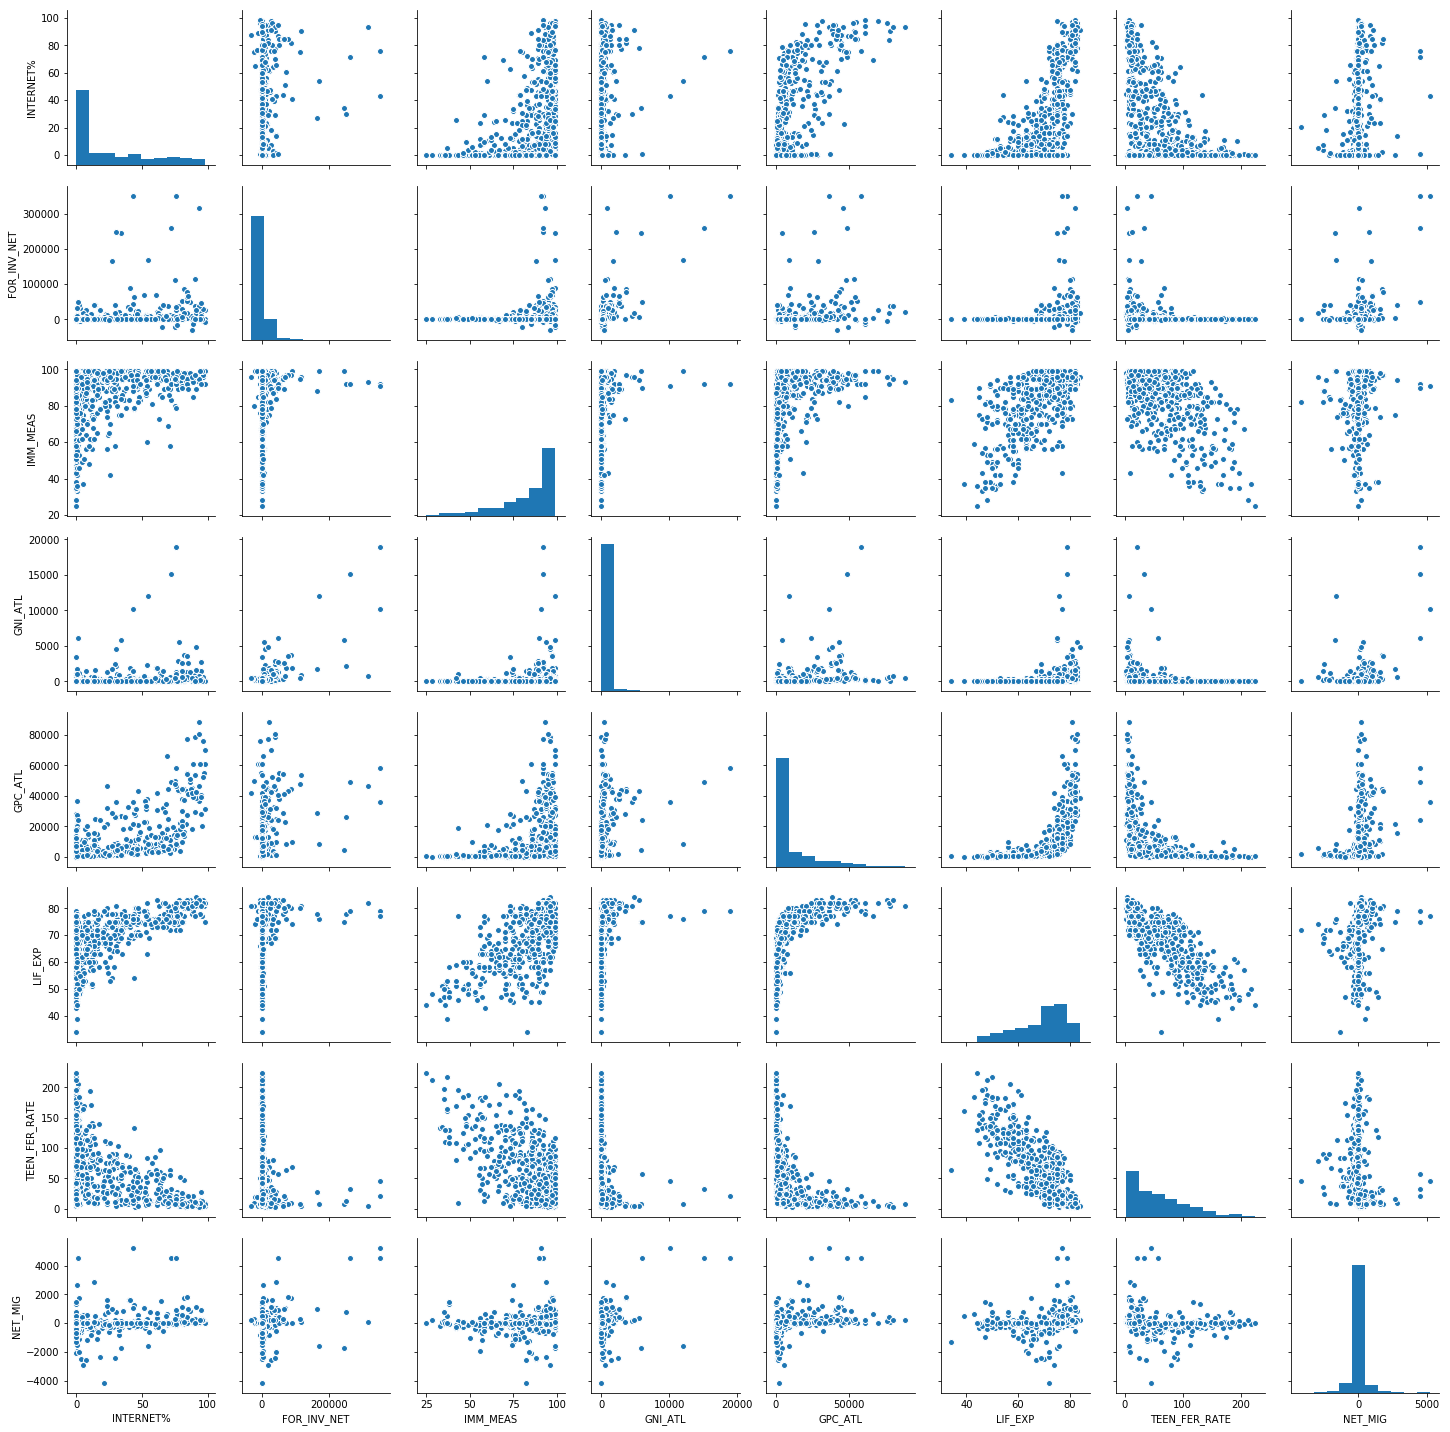

In [116]:
sbn.pairplot( clean_data_2.iloc[:,15:] )

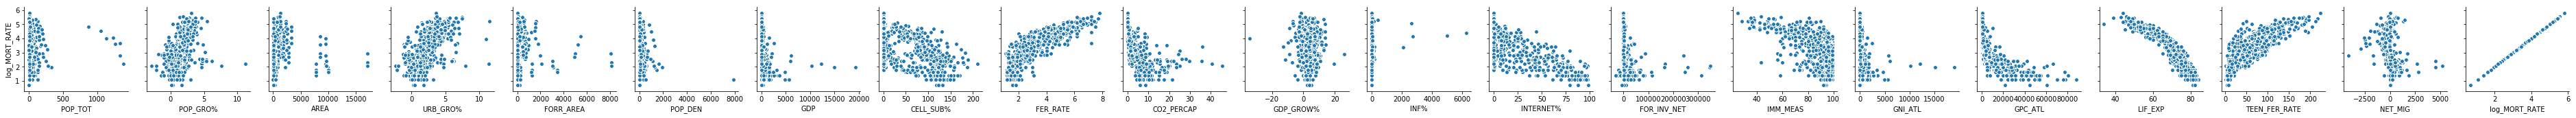

In [151]:
clean_data_3 = clean_data_2.copy()
clean_data_3['log_MORT_RATE'] = np.log(clean_data_3['MORT_RATE'])
clean_data_3['log_POP_DEN'] = np.log(clean_data_3['POP_DEN'])
clean_data_3['log_POP_TOT'] = np.log(clean_data_3['POP_TOT'])
clean_data_3['log_GDP'] = np.log(clean_data_3['GDP'])

pp = sbn.pairplot(data=clean_data_3,
                  y_vars=['log_MORT_RATE'],
                  x_vars=['POP_TOT', 'POP_GRO%', 'AREA', 'URB_GRO%', 'FORR_AREA',
       'POP_DEN', 'GDP', 'CELL_SUB%', 'FER_RATE', 'CO2_PERCAP',
       'GDP_GROW%', 'INF%', 'INTERNET%', 'FOR_INV_NET', 'IMM_MEAS', 'GNI_ATL',
       'GPC_ATL', 'LIF_EXP', 'TEEN_FER_RATE', 'NET_MIG', 'log_MORT_RATE'])

In [152]:
clean_data_3.columns

Index(['CNT', 'YR', 'POP_TOT', 'POP_GRO%', 'AREA', 'URB_GRO%', 'FORR_AREA',
       'MORT_RATE', 'POP_DEN', 'GDP', 'CELL_SUB%', 'FER_RATE', 'CO2_PERCAP',
       'GDP_GROW%', 'INF%', 'INTERNET%', 'FOR_INV_NET', 'IMM_MEAS', 'GNI_ATL',
       'GPC_ATL', 'LIF_EXP', 'TEEN_FER_RATE', 'NET_MIG', 'log_MORT_RATE',
       'log_POP_DEN', 'log_POP_TOT', 'log_GDP'],
      dtype='object')

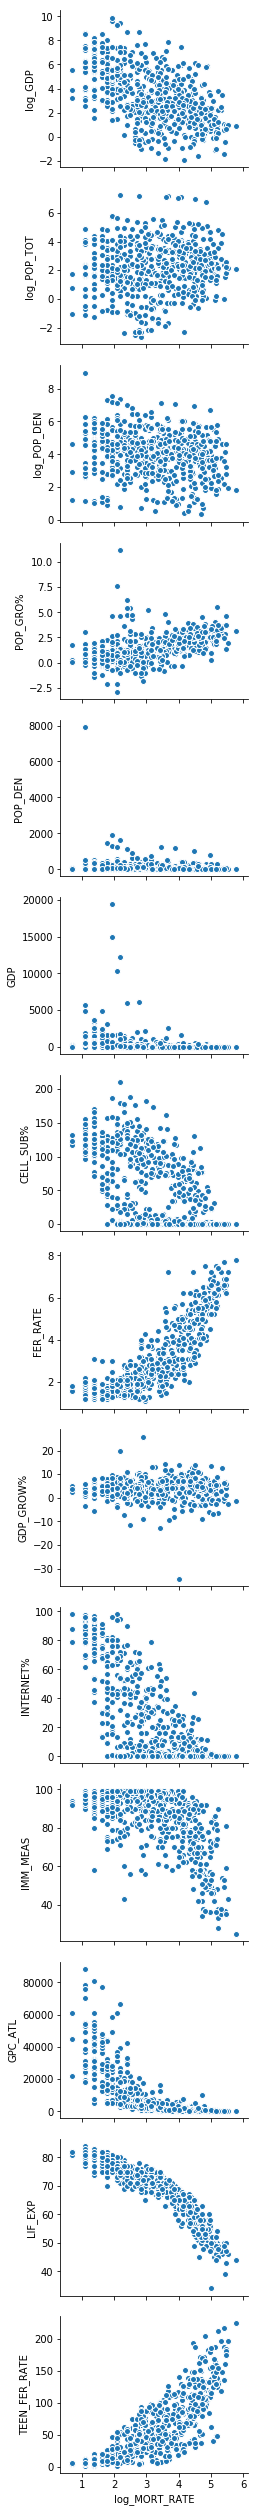

In [153]:


pp = sbn.pairplot(data=clean_data_3,
                  y_vars=['GDP','log_GDP','log_POP_TOT', 'log_POP_DEN', 'POP_GRO%', 
       'CELL_SUB%','FER_RATE','GDP_GROW%',  
       'INTERNET%', 'IMM_MEAS','GPC_ATL', 'LIF_EXP', 'TEEN_FER_RATE'],
                  x_vars=['log_MORT_RATE'],  aspect=11.7/8.27)

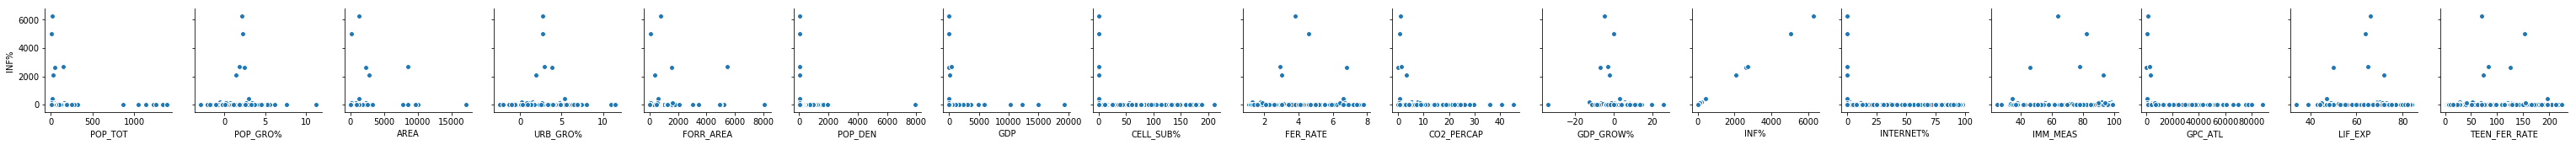

In [126]:
pp = sbn.pairplot(data=clean_data_3,
                  y_vars=['INF%'],
                  x_vars=['POP_TOT', 'POP_GRO%', 'AREA', 'URB_GRO%', 'FORR_AREA',
       'POP_DEN', 'GDP', 'CELL_SUB%', 'FER_RATE', 'CO2_PERCAP',
       'GDP_GROW%', 'INF%',  
       'INTERNET%', 'IMM_MEAS','GPC_ATL', 'LIF_EXP', 'TEEN_FER_RATE'])

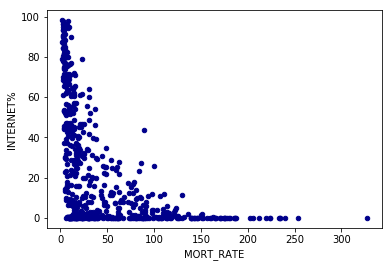

In [5]:
#clean_data.plot.scatter(x='TEEN_FER_RATE', y='LIF_EXP', c='DarkBlue')
clean_data_2.plot.scatter(x='MORT_RATE', y='INTERNET%', c='DarkBlue')
plt.show()

array([ 13.,  22.,  10.,  13.,  37.,  12.,  27.,  18.,  49.,  32.,  46.,
        19.,  34.,  29.,  19.,  15.,  84.,  17.,  28.,  24.,  89.,  20.,
        20.,  10.,   8.,  17.,  17.,  32.,  49.,  47.,  23., 130.,  91.,
        26.,  20.,  12.,  10.,  17.,  25.,  75.,  50.,  25.,  10.,  41.,
        47.,  72.,  33.,  20., 147.,  22.,  43.,  50., 103.,  39.,  63.,
       132.,  67.,  90.,  32., 143.,  33.,  35.,  52.,  34.,  64.,  78.,
        39.,  30.,  30.,   6.,  15.,  58.,  25.,  17.,  12., 114.,  44.,
        35.,  31.,   8.,  20.,  32.,  64.,  34.,  45.,  22., 107.,  13.,
        39.,  10.,   4.,   9.,   9.,   7.,  11.,  14.,  16.,  76.,  53.,
        40.,  20.,   9.,  11.,  17.,  30.,  52., 186., 126.,  84.,  27.,
        80.,  82.,  21.,  56.,  45.,  15.,  35.,  92.,  81.,  58.,  31.,
        19.,  16., 116.,  26.,  15.,   9.,  13.,  19.,  99.,  93.,  19.,
        88.,  80.,  11.,  10.,  10.,  10.,  59.,  19.,  22.,  15.,   8.,
         8.,   8.,  18.,   6.,  15.,  12.,  12.,  1

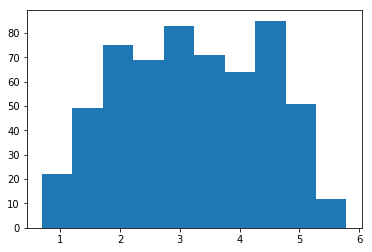

In [104]:
import math
#clean_data_2.plot.scatter(x='MORT_RATE', y='IMM_MEAS', c='DarkBlue')
#clean_data_2.plot.scatter(x='MORT_RATE', y='TEEN_FER_RATE', c='DarkBlue') 
#clean_data_2.plot.scatter(x='MORT_RATE', y='POP_GRO%', c='Cyan')
#clean_data_2.plot.scatter(x='MORT_RATE', y='FOR_INV_NET', c='Cyan')
#clean_data_2.plot.scatter(x='MORT_RATE', y='LIF_EXP', c='Black')
#clean_data_2.plot.scatter(x='MORT_RATE', y='GDP', c='Brown')
#clean_data_2.plot.scatter(x='MORT_RATE', y='NET_MIG', c='Brown')
#clean_data_2.plot.scatter(x='INTERNET%', y='POP_DEN', c='Purple')
#plt.hist(x=clean_data_2['INTERNET%'])
#clean_data_3 = clean_data_2
#clean_data_3['POP_DEN_log(e)'] = clean_data_2['POP_DEN'].apply(lambda x : math.log(x))  
#print(clean_data_3[['POP_DEN','POP_DEN_log(e)']])

#plt.hist(np.log(clean_data_2['INTERNET%']+1))



#plt.hist(sorted(clean_data_2['MORT_RATE'],reverse=True)[60:])
plt.hist(np.log(sorted(clean_data_2['MORT_RATE'],reverse=True)[0:]))

clean_data_2['MORT_RATE'].values

#plt.hist(clean_data_2['MORT_RATE'])
#print(clean_data_2['MORT_RATE'].max())
#print(clean_data_2['MORT_RATE'].min())
#plt.hist(np.log(clean_data_2['MORT_RATE']))

(array([184.,  47.,  44.,  31.,  41.,  22.,  28.,  30.,  28.,  23.]),
 array([-1.02136488, -0.69595849, -0.3705521 , -0.04514571,  0.28026067,
         0.60566706,  0.93107345,  1.25647984,  1.58188623,  1.90729262,
         2.23269901]),
 <a list of 10 Patch objects>)

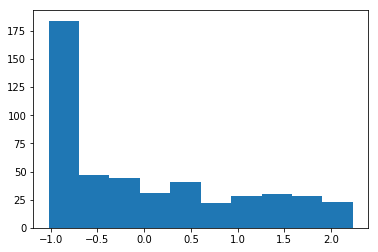

In [62]:
# plt.hist(x=np.log(clean_data_3['MORT_RATE']))
# plt.hist(x=(clean_data_3['MORT_RATE']))
# plt.show()
# break

#from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler

#plt.hist(np.log((clean_data_2['INTERNET%']-\
#         clean_data_2['INTERNET%'].mean())/clean_data_2['INTERNET%'].std() ))
#type(((clean_data_2['INTERNET%']-\
#         clean_data_2['INTERNET%'].mean())/clean_data_2['INTERNET%'].std()).values)

int_2 = clean_data_2[clean_data_2['INTERNET%']!=0]['INTERNET%']
int_2 = int_2.values.reshape(478,1)
scaler = StandardScaler()
int_out = scaler.fit(int_2)
hist_data = int_out.transform(int_2)
#plt.hist((clean_data_2['INTERNET%']-clean_data_2['INTERNET%'].min())/   \
#         (clean_data_2['INTERNET%'].max()-clean_data_2['INTERNET%'].min()))
         


plt.hist(hist_data)

#plt.show()

In [36]:
int = clean_data_2['INTERNET%'].values.reshape(581,1)

In [8]:
clean_data_2.sort_values(by='MORT_RATE',ascending=False)


,CNT,YR,POP_TOT,POP_GRO%,AREA,URB_GRO%,FORR_AREA,MORT_RATE,POP_DEN,GDP,...,INF%,INTERNET%,FOR_INV_NET,IMM_MEAS,GNI_ATL,GPC_ATL,LIF_EXP,TEEN_FER_RATE,NET_MIG,POP_DEN_log(e)
666,NER,1990.0,8.01,3.1,1267.0,3.6,19.5,327.0,6.3,2.48,...,-1.6,0.0,41.0,25.0,2.37,300.0,44.0,224.0,-3.0,1.840550
671,MLI,1990.0,8.47,1.9,1240.2,3.7,66.9,254.0,6.9,2.68,...,7.6,0.0,6.0,43.0,2.44,290.0,46.0,196.0,-173.0,1.931521
614,MOZ,1990.0,13.25,1.4,799.4,7.4,433.8,240.0,16.8,2.51,...,34.1,0.0,9.0,59.0,2.40,180.0,43.0,184.0,650.0,2.821379
669,GIN,1990.0,6.04,4.6,245.9,5.6,72.6,235.0,24.6,2.67,...,17.3,0.0,18.0,35.0,2.59,430.0,50.0,181.0,800.0,3.202746
672,MWI,1990.0,9.44,3.7,118.5,6.5,39.0,235.0,100.1,1.88,...,10.7,0.0,23.0,81.0,1.72,180.0,47.0,174.0,-939.0,4.606170
533,SLE,2000.0,4.56,2.8,72.3,3.5,29.2,233.0,63.2,0.64,...,3.3,0.1,39.0,37.0,0.66,140.0,39.0,161.0,500.0,4.146304
674,GNB,1990.0,1.01,2.4,36.1,7.4,22.2,224.0,36.0,0.24,...,30.2,0.0,2.0,53.0,0.22,220.0,49.0,136.0,-30.0,3.583519
349,NER,2000.0,11.35,3.6,1267.0,4.1,13.3,224.0,9.0,1.80,...,4.5,0.0,16.0,37.0,1.91,170.0,50.0,217.0,-28.0,2.197225
381,MLI,2000.0,10.97,2.8,1240.2,5.3,59.0,220.0,9.0,2.95,...,-0.6,0.1,60.0,49.0,3.10,280.0,48.0,188.0,-67.0,2.197225
607,NGA,1990.0,95.27,2.6,923.8,5.4,172.3,212.0,104.6,30.76,...,9.3,0.0,588.0,54.0,27.39,290.0,46.0,148.0,-96.0,4.650144


In [64]:
!pwd

/Users/loaner/ds/GITHUB_REPOS/sf18_ds12/projects/02-luther/TR_web_scrape_country
